## Decision Tree

Decision Trees (DTs) are a supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

## Random Forest

A **random forest** is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

Random Forest classifier is a type of ensemble learning.

# iris dataset

### Use Decision Tree for Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
data = iris.data.astype(np.float32)
target = iris.target.astype(np.float32)

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data, target, test_size=0.3, random_state=123
)

In [7]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [8]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

### Default parameters

#### criterion='entropy'
Evaluate feature importance. 'entropy' algorithm is based on Information theory which is a method to quantify information in a message. In our example, it is used to quantify the information of the data to make decision and split the node.

#### min_samples_leaf=1
Minimum number of sample(s) to qualify as leaf node

#### min_samples_split=2
Minimum number of sample(s) to qualify for internal node split

#### splitter='best'
Method used by the model to make decision when splitting. 'best' method will tell the model to consider feature with highest importance

#### random_state=0
Seed to generate random number by the model. Will effect any randomness from the model

## View tree

In [9]:
def view_tree(classifier):
    fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4), dpi=150) #change dpi to resize image
    tree_view = plot_tree(classifier, feature_names=iris.feature_names,
              class_names=iris.target_names, ax=axes, filled=True)

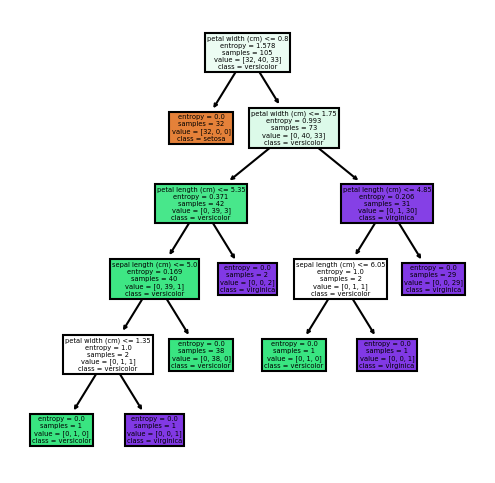

In [10]:
view_tree(classifier)

The color filled indicate the majority class for classification. 

In [11]:
predictions = classifier.predict(X_test)

In [12]:
print(confusion_matrix(y_test,predictions))

[[18  0  0]
 [ 0 10  0]
 [ 0  3 14]]


In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       0.77      1.00      0.87        10
         2.0       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45



### Use Random Forest for Classification

In [14]:
classifier = RandomForestClassifier()

In [15]:
classifier.fit(X_train,y_train)

/home/deven/anaconda3/envs/ml-fundamentals/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Default parameters

#### bootstrap=True
Decide if the model will use all or different(random) number of sample for every tree. If true, the model randomly choose number of samples for every tree.

#### max_features='auto'
Decide the number of features to conisder for best split. 'auto' will use sqrt(n_features) for making decision

#### min_samples_leaf=1
Minimum number of sample(s) to qualify as leaf node

#### min_samples_split=2
Minimum number of sample(s) to qualify for internal node split

#### n_estimators=10
Decide the number of decision tree. This is important as RandomForest uses multiple decision trees.

#### verbose=0
To view training information

## View trees
RandomForest algorithm is a combination of few decision trees. Therefore, every tree should be plot individually

In [16]:
# Number of trees
num_trees = len(classifier.estimators_)
print(num_trees)

10


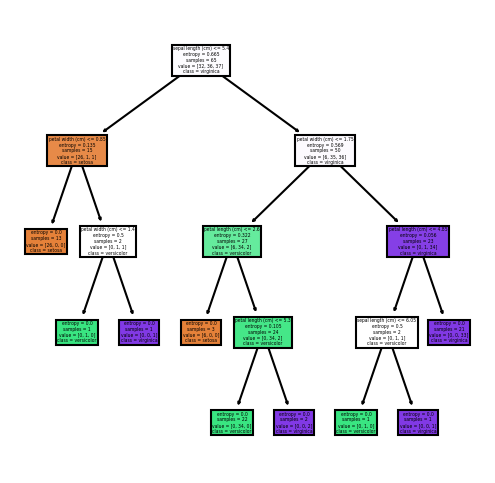

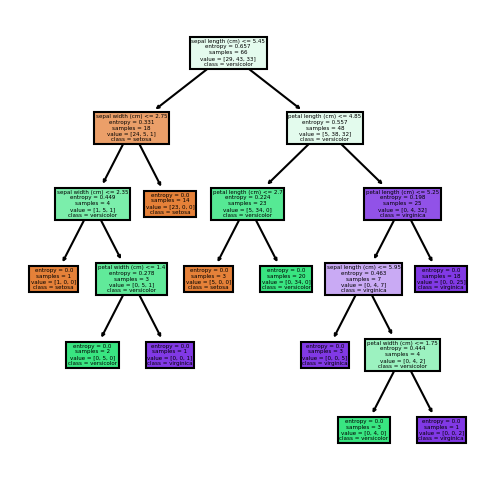

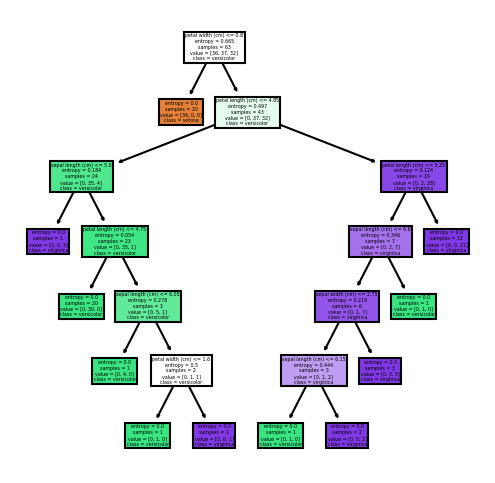

In [17]:
for i in range(num_trees):
    if i > 2: #Only plot the first 3 trees
        break
    view_tree(classifier.estimators_[i])
    print()

Different trees provide different decision branch

In [18]:
predictions = classifier.predict(X_test)

In [19]:
# Plot confusion matrix
def plot_cm(y_test, predictions, figsize):
    cm = confusion_matrix(y_test,predictions)
    df_cm = pd.DataFrame(cm)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'

    plt.figure(figsize=figsize)
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},
               fmt='g')

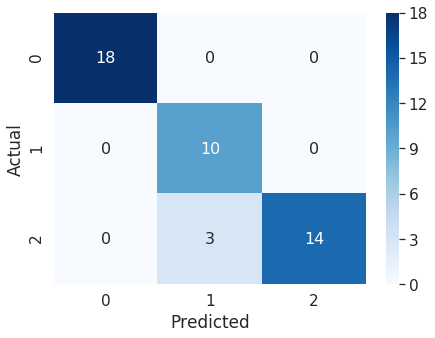

In [20]:
plot_cm(y_test, predictions, figsize=(7, 5))

### Result Interpretation - Confusion Matrix

predicted axis: the result of model prediction
actual axis: actual ground truth

The desired result is for the prediction to be the same as actual. From the matrix, we can see that the model predict 100% correct for item 0 and 2 and produce two wrong predictions for item 1. The confusion matrix provides useful information for model bias, as in, what is the tendency of the model prediction.

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       0.77      1.00      0.87        10
         2.0       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45



### Result Interpretaion - Classification Report

#### Precision
The percentage of correct predictions. Like the confusion matrix, you can see that item 0 and 2 is correctly predicted 100%.

#### Recall
Ability of the classifier to find all positive instances. Look from actual axis for item 2. The model find positive instances 15 times out of total instances of 17. This is 88% of the total.

#### F1-Score
The weighted average of the precision and recall. 

<img src="https://miro.medium.com/max/752/1*UJxVqLnbSj42eRhasKeLOA.png" />

[Image Source: Towards Data Science](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c#:~:text=We%20use%20the%20harmonic%20mean%20instead%20of%20a%20simple%20average)

#### Support 
Total number of occurences of given class. We call them item in this example

# 20 news Group Classification

### Use decision tree

In [22]:
news_categories = ['comp.graphics','comp.os.ms-windows.misc',
                   'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
                   'comp.windows.x']

ng = datasets.fetch_20newsgroups(categories=news_categories)

Refer https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html for full news categories. We will only use some in this example 

### View data

In [23]:
ng.data[:1]

["From: lemons@cadsys.enet.dec.com\nSubject: Xremote into X11R6?\nReply-To: lemons@cadsys.enet.dec.com ()\nOrganization: Digital Equipment Corporation\nLines: 12\nX-Newsreader: mxrn 6.18\n\n\nHi!\n\nI remember reading (or hallucinating) that NCD's PC-Xremote functionality had \nbeen given, by NCD, to MIT for inclusion in X11R6.  Is this true?  If so,\n(set mode/cheap) can I just wait for X11R6 to get compressed serial line\nX server support?\n\nThanks!\n\nTerry Lemons\nDigital Equipment Corporation\n"]

In [24]:
news_class = ng.target[:1]

# Let's see which class does the news belong.
print(news_class)

# Let's convert the index to string label
print(ng.target_names[news_class[0]])

[4]
comp.windows.x


### Data preparation 1 : Vectorizing

Sklearn algorithm cannot process strings. Because our data is in string format, it needs to be converted to numbers. This process is called vectorizing.

There are lots of vectorizing algorithm. For now, we are going to use a simple algorithm called CountVectorier. This algorithm converts the data into a matrix of token counts. A token is a single word. A sentence with five words has 5 tokens. 

In [25]:
vectorizer = CountVectorizer()
data = vectorizer.fit_transform(ng.data)

In [26]:
data

<2936x66735 sparse matrix of type '<class 'numpy.int64'>'
	with 406296 stored elements in Compressed Sparse Row format>

Now, we have the right format. The data has 11314 sentences and 130107 vocabulary. Wow! That's a lot.

In [27]:
dat1 = data[1,:].toarray()
dat1

array([[0, 0, 0, ..., 0, 0, 0]])

Every sentence in the dataset is converted to a vector of length 66735. The value of each element indicate the total occurence of a particular word in the sentence. 

### Data preparation 2 : Split train and test

In [28]:
# Convert target to numpy float

target = ng.target.astype(np.float32)

In [29]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data, target, test_size=0.3, random_state=123
)

### Train model

In [30]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [31]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

### Evaluate

In [32]:
predictions = classifier.predict(X_test)

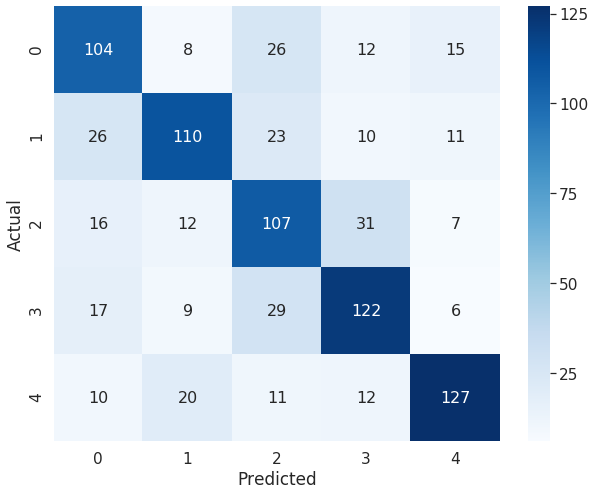

In [33]:
plot_cm(y_test, predictions, figsize=(10, 8))

As said before, it is desired that the diagonal be the most significant number for the particular column.

However, in this example, the model does not classify the data well.

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.60      0.63      0.62       165
         1.0       0.69      0.61      0.65       180
         2.0       0.55      0.62      0.58       173
         3.0       0.65      0.67      0.66       183
         4.0       0.77      0.71      0.73       180

    accuracy                           0.65       881
   macro avg       0.65      0.65      0.65       881
weighted avg       0.65      0.65      0.65       881



We can see that the accuracy of model accorss all class is only 65%

### Use random forest

In [35]:
classifier = RandomForestClassifier()

In [36]:
classifier.fit(X_train, y_train)

/home/deven/anaconda3/envs/ml-fundamentals/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
predictions = classifier.predict(X_test)

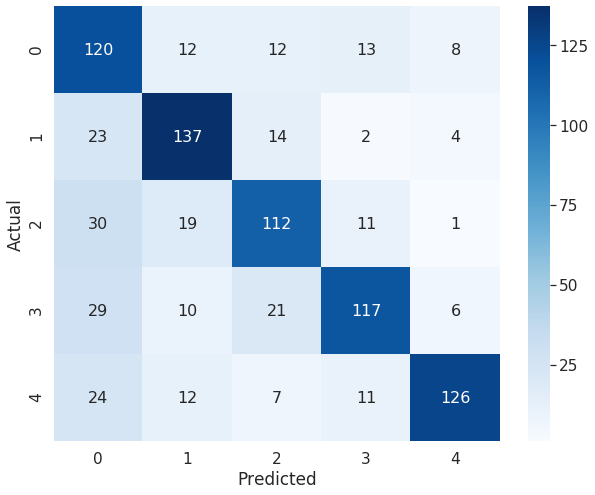

In [38]:
plot_cm(y_test, predictions, figsize=(10, 8))

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.53      0.73      0.61       165
         1.0       0.72      0.76      0.74       180
         2.0       0.67      0.65      0.66       173
         3.0       0.76      0.64      0.69       183
         4.0       0.87      0.70      0.78       180

    accuracy                           0.69       881
   macro avg       0.71      0.70      0.70       881
weighted avg       0.71      0.69      0.70       881



Even though we are using the default value, the model performs well with 69% accuracy.

The model can be improved by performing a grid search to find the best hyperparameters.